Firma AAAAutoSprzedam jest platformą umożliwiającą publikowanie ogłoszeń sprzedaży 
samochodów. Oprócz bardzo taniego ogłoszenia typu Basic oferuje swoim klientom – 
ogłoszeniodawcom – również płatne promowane ogłoszenia typu Premium i Plus. Na liście 
ogłoszeń w pierwszej kolejności pojawiają się ofery Premium, następnie Plus a na końcu pozostałe 
ogłoszenia.  Klienci są informowani, że wykupienie płatego ogłoszenia zwiększy jego skuteczność.
W celu zwiększenia efektywności sprzedaży promowanych, dział komunikacji z klientem 
potrzebuje wiedzy o tym, jak poszczególne produkty wpływają na sukces ogłoszeniodawcy. 
Pomoże to doprecyzować przekaz o skuteczność płatnego ogłoszenia Premium lub Plus.
Zespół analityczny proszony jest o przygotowanie 15 minutowej prezentacji, odpowiadającej na 
pytania:<br>
• Jaki jest wpływ droższych produktów na skuteczność ogłoszenia?<br>
• Czy w danych są wzorce, które uznalibyście za ciekawe lub niespodziewane?<br>
• Jaki jest wpływ dostępnych zmiennych na skuteczność ogłoszenia?<br>
• Jakie dodatkowe dane mogłyby być wykorzystane w analizie?<br>

views per day

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AAAutoSprzedam_data.csv', sep=';')

In [3]:
data.isnull().sum()

article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64

In [4]:
data.created_date = pd.to_datetime(data.created_date)
data.deleted_date = pd.to_datetime(data.deleted_date)

In [5]:
stock_days2 = data.deleted_date - data.created_date

In [6]:
data['stock_days2'] = stock_days2

In [7]:
data.stock_days2 = data.stock_days2/np.timedelta64(1, 'D')
data.stock_days2 = data.stock_days2 + 1

In [8]:
data.stock_days2.min()

1.0

In [9]:
data[data.stock_days2 == 0]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,stock_days2


In [10]:
data.drop('stock_days',axis=1,inplace=True)

In [11]:
data['ctr2'] = data.detail_views/data.search_views

In [12]:
data.drop('ctr',axis=1, inplace=True)

In [13]:
data.article_id.value_counts().head(20)

359772384    2
360768628    2
360768627    2
364638423    2
350214315    2
360768625    2
360768632    2
360768624    2
354755824    2
350214314    2
354755822    2
360472733    2
357528924    2
360793587    2
358519054    2
354755829    2
359754168    1
349571668    1
360448597    1
350173618    1
Name: article_id, dtype: int64

In [14]:
data = data.sort_values(by='article_id')

In [15]:
data = data.drop_duplicates(subset='article_id', keep=False)

In [16]:
data.sort_values('article_id',ascending=True)

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2
38868,347232386,Basic,Nissan,6850,7,2005,2018-07-04,2018-07-13,297.0,22.0,10.0,0.074074
29915,347232409,Basic,Peugeot,850,5,2004,2018-07-04,2018-08-14,3920.0,276.0,42.0,0.070408
45555,347232416,Basic,Mercedes-Benz,16950,7,2013,2018-07-04,2018-09-15,1564.0,118.0,74.0,0.075448
77759,347232417,Basic,Skoda,2995,6,2010,2018-07-04,2018-07-16,2372.0,183.0,13.0,0.077150
72821,347232422,Basic,Toyota,4300,4,2008,2018-07-04,2018-10-01,3215.0,208.0,90.0,0.064697
3076,347232425,Basic,Opel,1850,4,2003,2018-07-04,2018-07-10,231.0,50.0,7.0,0.216450
48396,347246626,Basic,Toyota,6450,1,2009,2018-07-04,2018-07-19,236.0,30.0,16.0,0.127119
51363,347246657,Basic,Toyota,9450,3,2016,2018-07-04,2018-07-13,74.0,1.0,10.0,0.013514
71680,347246658,Basic,Toyota,9250,3,2016,2018-07-04,2018-07-25,204.0,1.0,22.0,0.004902
13874,347246660,Basic,BMW,24890,4,2014,2018-07-04,2018-10-01,7456.0,457.0,90.0,0.061293


In [17]:
data['dv_perD'] = data.detail_views/data.stock_days2

In [18]:
data['sv_perD'] = data.search_views/data.stock_days2

In [19]:
data.sort_values(['sv_perD','dv_perD'],ascending=False)

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD
64208,360493469,Basic,Volvo,100,1,2018,2018-10-12,2018-10-20,96582.0,1559.0,9.0,0.016142,173.222222,10731.333333
5179,363933708,Premium,Audi,4500,2,2015,2018-11-20,2018-12-10,171829.0,6155.0,21.0,0.035820,293.095238,8182.333333
44791,363933706,Premium,Audi,4500,2,2015,2018-11-20,2018-12-10,171168.0,4682.0,21.0,0.027353,222.952381,8150.857143
38966,363933707,Premium,Audi,4500,2,2014,2018-11-20,2018-12-10,158698.0,13926.0,21.0,0.087752,663.142857,7557.047619
74838,359753805,Basic,Renault,199,7,2015,2018-10-04,2019-01-21,608754.0,12286.0,110.0,0.020182,111.690909,5534.127273
49762,357876594,Basic,Citroen,99,7,2017,2018-09-12,2018-09-19,37238.0,372.0,8.0,0.009990,46.500000,4654.750000
72007,348760265,Premium,Peugeot,649,3,2002,2018-07-12,2018-09-09,262007.0,3473.0,60.0,0.013255,57.883333,4366.783333
13945,358532508,Premium,Ford,575,3,2004,2018-09-20,2018-10-03,57236.0,501.0,14.0,0.008753,35.785714,4088.285714
10721,347277802,Premium,Fiat,499,5,2003,2018-07-04,2018-07-11,32565.0,357.0,8.0,0.010963,44.625000,4070.625000
51285,354421135,Premium,Audi,1245,6,1997,2018-08-16,2018-09-01,68252.0,1483.0,17.0,0.021728,87.235294,4014.823529


In [20]:
data.first_registration_year.replace(2106,2006,True)

In [21]:
data.first_registration_year.replace(2020,2002,True)

In [22]:
data['old'] = 2019 - data.first_registration_year

In [23]:
data.sort_values('first_registration_year',0,False)

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD,old
7047,363572119,Basic,Land Rover,178888,5,2019,2018-11-16,2018-11-20,970.0,38.0,5.0,0.039175,7.600000,194.000000,0
78161,355477561,Basic,Skoda,34950,7,2019,2018-08-24,2018-09-01,84.0,0.0,9.0,0.000000,0.000000,9.333333,0
41755,355477564,Basic,Skoda,21995,7,2019,2018-08-24,2018-09-01,85.0,0.0,9.0,0.000000,0.000000,9.444444,0
46681,355477563,Basic,Skoda,20695,7,2019,2018-08-24,2018-09-01,88.0,4.0,9.0,0.045455,0.444444,9.777778,0
22265,360811305,Basic,Volkswagen,35745,1,2019,2018-10-16,2019-01-17,708.0,19.0,94.0,0.026836,0.202128,7.531915,0
33306,359233680,Basic,Nissan,26945,3,2019,2018-09-28,2019-01-14,735.0,25.0,109.0,0.034014,0.229358,6.743119,0
57720,355477562,Basic,Skoda,21650,7,2019,2018-08-24,2018-09-01,77.0,1.0,9.0,0.012987,0.111111,8.555556,0
35693,363592564,Basic,Volvo,55130,2,2019,2018-11-16,2019-02-28,1942.0,27.0,105.0,0.013903,0.257143,18.495238,0
36997,360811304,Basic,Volkswagen,37250,1,2019,2018-10-16,2019-01-17,825.0,23.0,94.0,0.027879,0.244681,8.776596,0
41917,363615551,Basic,Volkswagen,28345,4,2019,2018-11-16,2019-02-04,2507.0,84.0,81.0,0.033506,1.037037,30.950617,0


In [24]:
data.groupby(by='product_tier').mean()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD,old
product_tier,,,,,,,,,,,
Basic,3.574594e+08,15100.425396,4.644016,2011.122658,1909.310405,82.542171,37.034361,0.047283,2.790178,58.362783,7.877342
Plus,3.590835e+08,12828.761821,4.716287,2009.577933,6754.464098,249.821366,39.831874,0.040950,7.527167,197.687253,9.422067
Premium,3.579793e+08,14648.924341,4.191526,2010.368785,13419.518374,399.963251,34.284911,0.035783,13.323658,436.896388,8.631215


In [55]:
data[data.make_name == 'Alpina']

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days2,ctr2,dv_perD,sv_perD,old
38394,347969918,Basic,Alpina,36999,1,2012,2018-07-08,2018-09-01,3825.0,168.0,56.0,0.043922,3.000000,68.303571,7
72756,357113637,Basic,Alpina,28950,5,1996,2018-09-04,2018-12-07,9635.0,279.0,95.0,0.028957,2.936842,101.421053,23
10324,357140914,Basic,Alpina,27990,1,2011,2018-09-04,2019-01-04,9173.0,286.0,123.0,0.031178,2.325203,74.577236,8
19627,359757342,Basic,Alpina,22500,3,1983,2018-10-04,2018-11-09,3861.0,503.0,37.0,0.130277,13.594595,104.351351,36
36608,362840468,Basic,Alpina,35000,3,1983,2018-11-08,2019-02-06,10531.0,940.0,91.0,0.089260,10.329670,115.725275,36
69664,364289690,Basic,Alpina,59950,5,2010,2018-11-24,2019-01-22,8401.0,556.0,60.0,0.066183,9.266667,140.016667,9
31243,364304447,Plus,Alpina,13995,6,2000,2018-11-24,2018-12-19,7309.0,392.0,26.0,0.053633,15.076923,281.115385,19


In [64]:
#jux = data[['product_tier', 'make_name', 'price', 'first_registration_year', 'search_views', 'detail_views', 'stock_days2', 'ctr2', 'dv_perD',
#       'sv_perD', 'old']].groupby(by='make_name').describe()

In [65]:
#jux.to_excel('zestawienie.xlsx')

In [48]:
urw = data.groupby('make_name').article_id.count() 

In [60]:
ch = urw.sort_values(ascending=False)

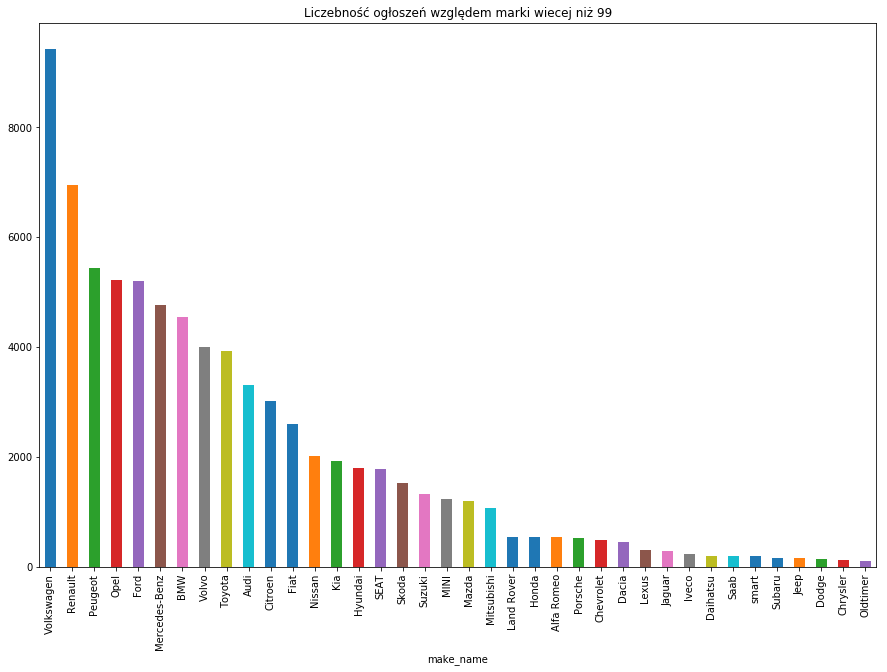

In [66]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_title('Liczebność ogłoszeń względem marki wiecej niż 99')

ka = ch[ch > 100]
ka.plot(kind='bar')

In [70]:
price_sum = data.groupby('make_name').price.sum()

In [71]:
price_sum_desc = price_sum.sort_values(ascending=False)

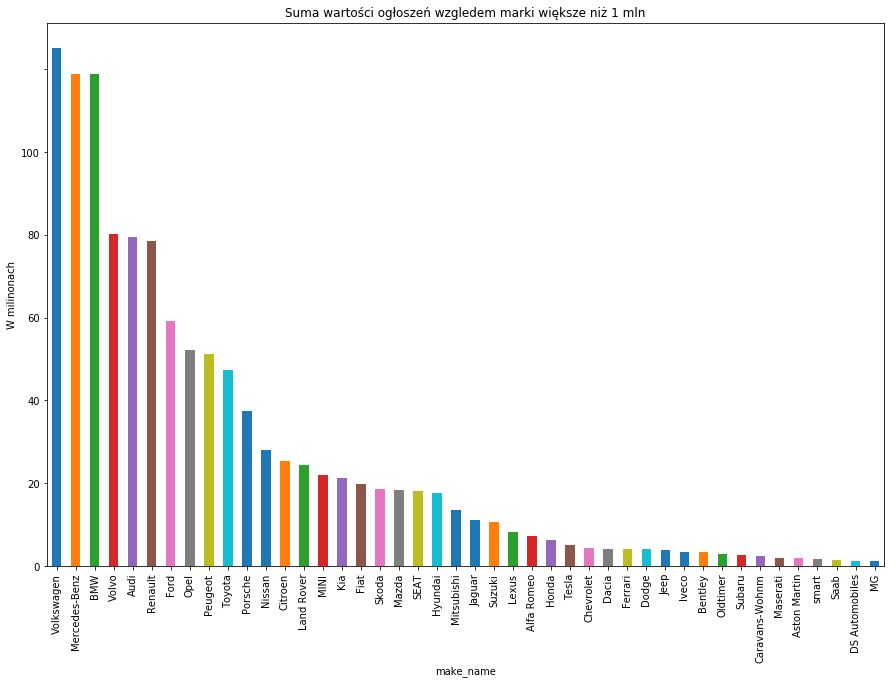

In [138]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_ylabel('W milinonach')
ax.set_xlabel('Nazwa marki')
ax.set_title('Suma wartości ogłoszeń wzgledem marki większe niż 1 mln')

y_vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}'.format(x * 100) for x in y_vals])

var = price_sum_desc[price_sum_desc > 1000000]
var.plot(kind='bar')

In [139]:
fig.tight_layout()
fig.savefig('Suma wartości wzgledem marki')

In [120]:
prod_name_sum = data.groupby(['product_tier', 'make_name']).price.sum()

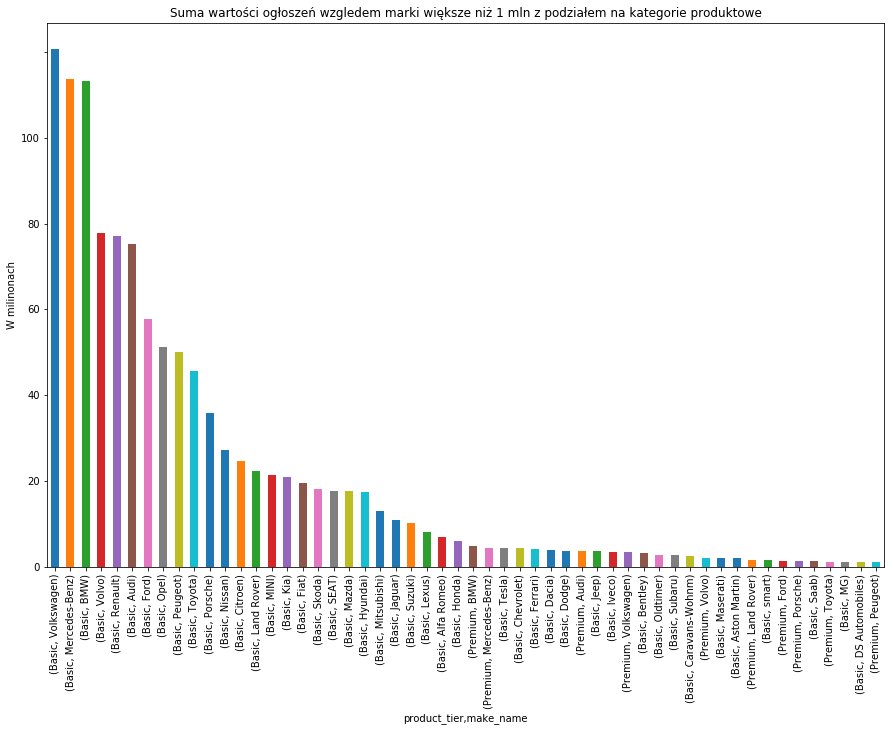

In [129]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_ylabel('W milinonach')
ax.set_xlabel('Nazwa marki')
ax.set_title('Suma wartości ogłoszeń wzgledem marki większe niż 1 mln z podziałem na kategorie produktowe')

y_vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}'.format(x * 100) for x in y_vals])

var = prod_name_sum_des[prod_name_sum_des > 1000000]
var.plot(kind='bar')

In [136]:
fig.tight_layout()

fig.savefig('Suma wartości wzgledem marki i rodzaj porduktu')

In [142]:
first_reg = data.groupby('first_registration_year').article_id.count()

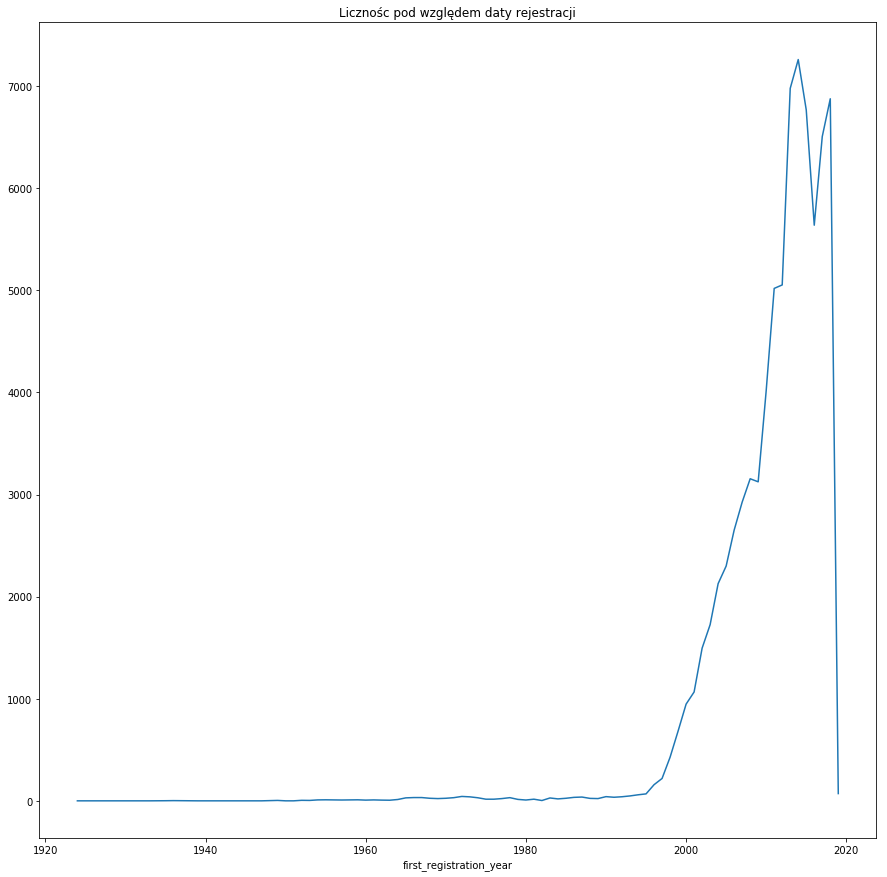

In [147]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
ax.set_title("Licznośc pod względem daty rejestracji")
first_reg.plot(kind='line')

In [148]:
fig.tight_layout()
fig.savefig('Liczność pod względem pierwszej rejestracji')

In [154]:
dv_perD_mean = data.groupby('make_name').dv_perD.mean()
sv_perD_mean = data.groupby('make_name').sv_perD.mean()

In [ ]:
dv_perD_mean.plot(kind='bar')
sv_perD_mean.plot(kind='line',rot=90)

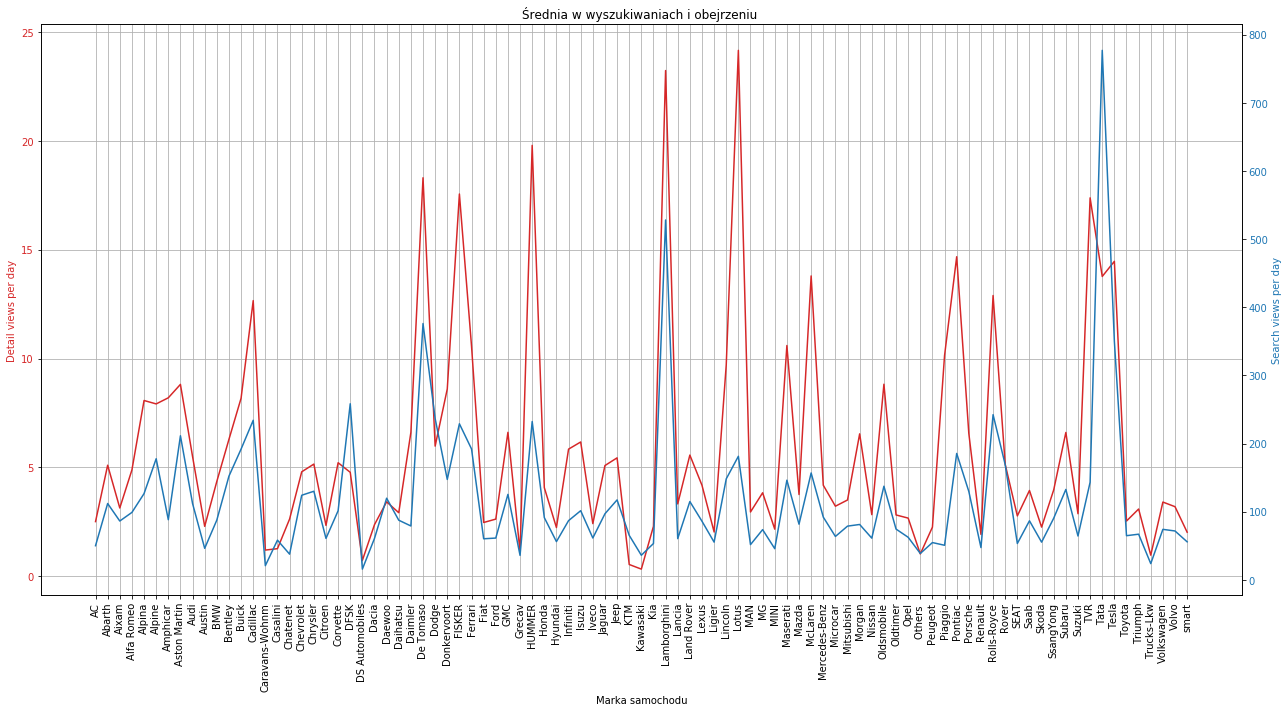

In [246]:
fig,ax1 = plt.subplots(figsize=(18,10))
color = 'tab:red'
ax1.set_xlabel('Marka samochodu')
ax1.set_ylabel('Detail views per day', color=color)
ax1.set_title('Średnia w wyszukiwaniach i obejrzeniu ')
ax1.plot(dv_perD_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Search views per day', color=color) 
ax2.plot(sv_perD_mean, color=color)
ax2.tick_params(labelcolor=color)

fig.tight_layout()
plt.show()

In [247]:
fig.savefig('Details views i search views')

In [249]:
ctr2_mean = data.groupby('make_name').ctr2.mean()

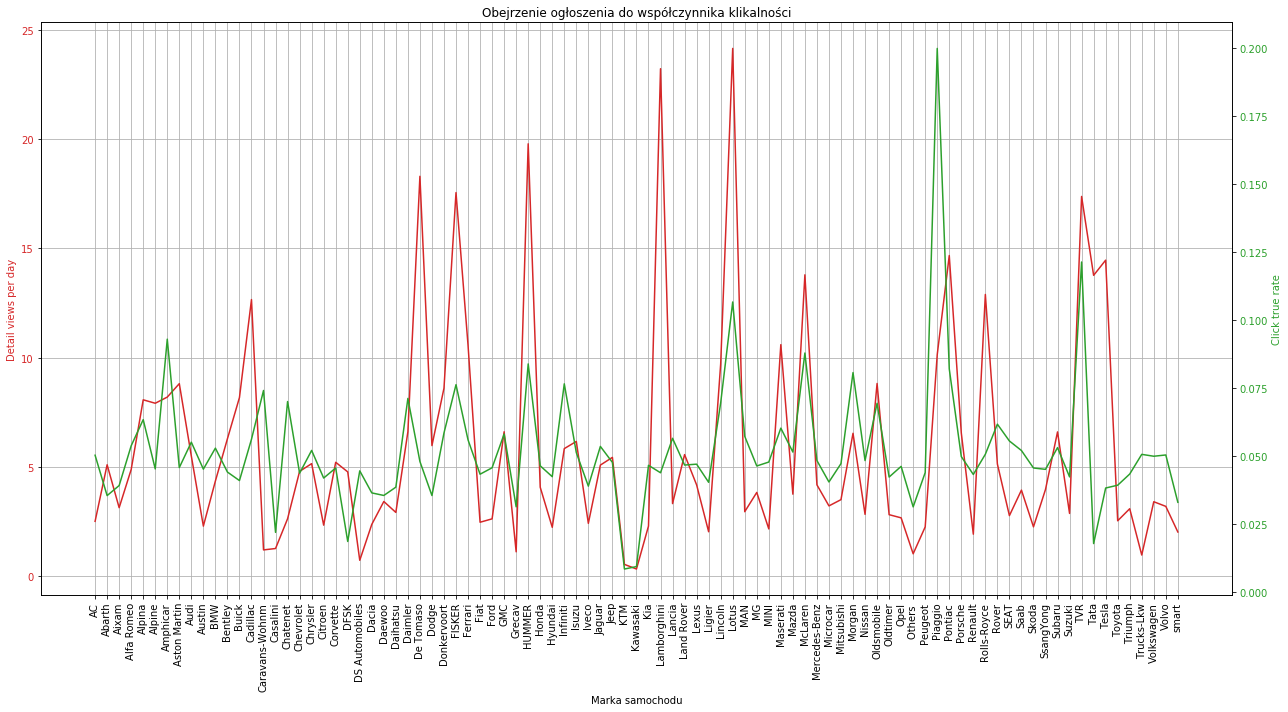

In [254]:
fig,ax1 = plt.subplots(figsize=(18,10))
color = 'tab:red'
ax1.set_xlabel('Marka samochodu')
ax1.set_ylabel('Detail views per day', color=color)
ax1.set_title('Obejrzenie ogłoszenia do współczynnika klikalności')
ax1.plot(dv_perD_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Click true rate', color=color) 
ax2.plot(ctr2_mean, color=color)
ax2.tick_params(labelcolor=color)

fig.tight_layout()
plt.show()

In [255]:
fig.savefig('Obejrzenia do współczynnika klikalności')

In [257]:
stock_days2_mean = data.groupby('make_name').stock_days2.mean()

In [262]:
stock_days2_mean_sort = stock_days2_mean.sort_values(ascending=False)

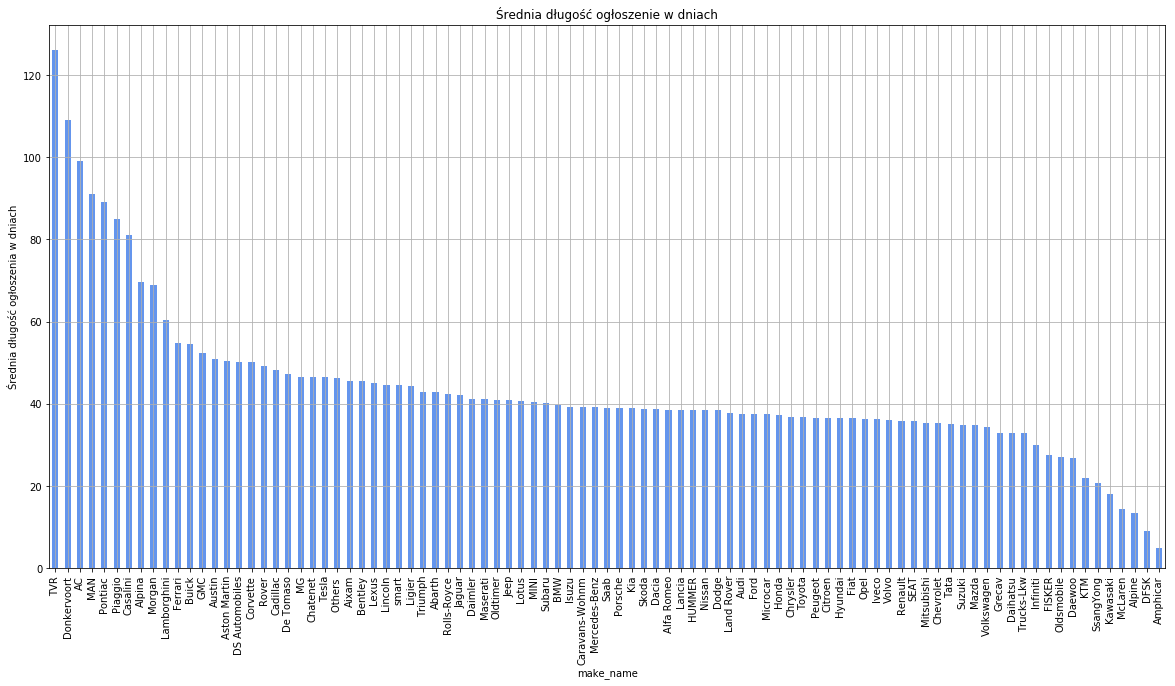

In [320]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_title('Średnia długość ogłoszenie w dniach')
ax.set_xlabel('Marka samochodu')
ax.set_ylabel('Średnia długość ogłoszenia w dniach')
stock_days2_mean_sort.plot(kind='bar',color='cornflowerblue',grid=True,)

In [321]:
fig.tight_layout()
fig.savefig('Średnia długość ogłoszenia')

In [290]:
product_tier_count = data.groupby('product_tier').article_id.count()

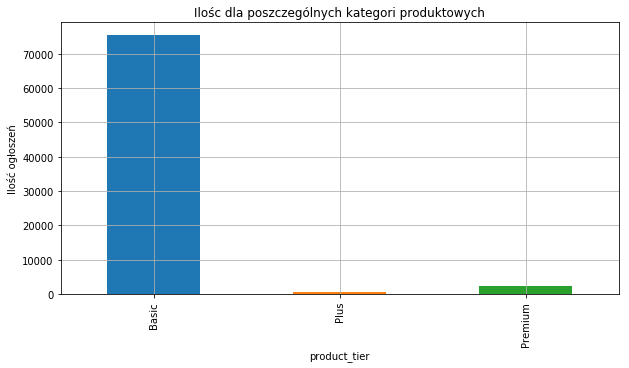

In [307]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Ilośc dla poszczególnych kategori produktowych')
ax.set_ylabel('Ilość ogłoszeń')
product_tier_count.plot(kind='bar',grid=True)

In [298]:
product_tier_detail_mean = data.groupby('product_tier').detail_views.mean()

In [296]:
fig.tight_layout()
fig.savefig('Podział ilościowy na produkty')

In [298]:
product_tier_detail_mean = data.groupby('product_tier').detail_views.mean()

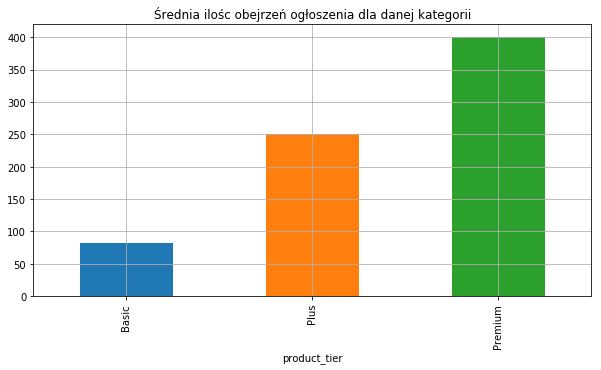

In [310]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Średnia ilośc obejrzeń ogłoszenia dla danej kategorii')
ax.set_ylabel('')
product_tier_detail_mean.plot(kind='bar',grid=True)

In [311]:
fig.tight_layout()
fig.savefig('Średnia ilość obejrzeń ogłoszenia na kategorię produktową')

In [312]:
product_tier_search_mean = data.groupby('product_tier').search_views.mean()

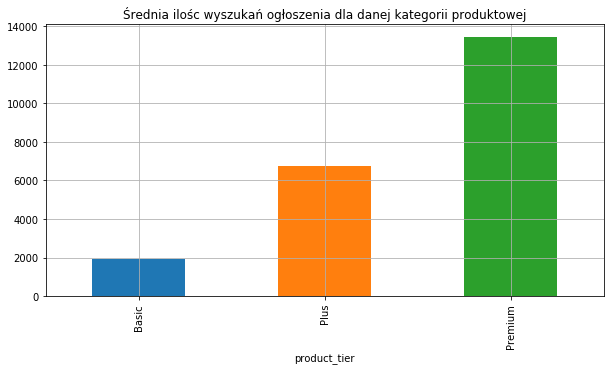

In [314]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Średnia ilośc wyszukań ogłoszenia dla danej kategorii produktowej')
ax.set_ylabel('')
product_tier_search_mean.plot(kind='bar',grid=True)

In [315]:
fig.tight_layout()
fig.savefig('Średnia ilość wyszukań ogłoszenia na kategorię produktową')

In [323]:
product_tier_stockday_mean = data.groupby('product_tier').stock_days2.mean()

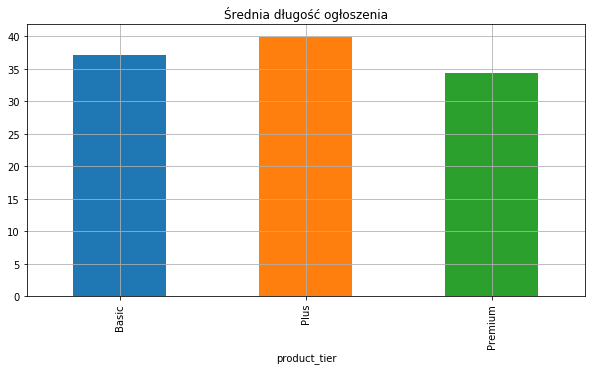

In [339]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Średnia długość ogłoszenia')
ax.set_ylabel('')
product_tier_stockday_mean.plot(kind='bar',grid=True)

In [340]:
fig.tight_layout()
fig.savefig('Średnia długość ogłoszenia na kategorię produktową')

In [ ]:
product_tier_dv_perD_mean = data.groupby('product_tier').dv_perD.mean()

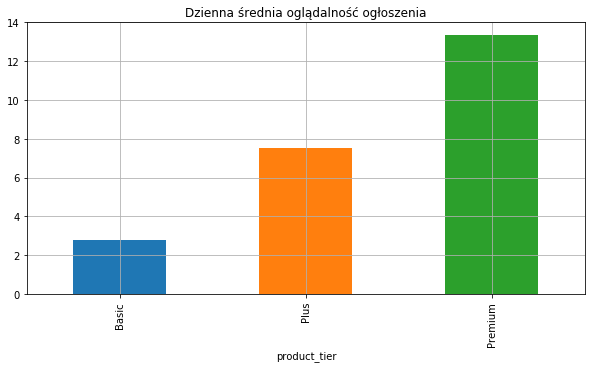

In [345]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Dzienna średnia oglądalność ogłoszenia')
ax.set_ylabel('')
product_tier_dv_perD_mean.plot(kind='bar',grid=True)

In [346]:
fig.tight_layout()
fig.savefig('Dzienna średnia oglądalność ogłoszenia na kategorię produktową')

In [347]:
product_tier_sv_perD_mean = data.groupby('product_tier').sv_perD.mean()

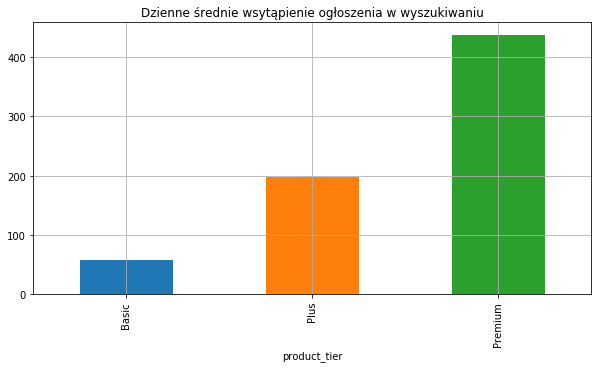

In [349]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Dzienne średnie wsytąpienie ogłoszenia w wyszukiwaniu')
ax.set_ylabel('')
product_tier_sv_perD_mean.plot(kind='bar',grid=True)

In [350]:
fig.tight_layout()
fig.savefig('Dzienne średnie wsytąpienie ogłoszenia w wyszukiwaniu')

In [25]:
data.product_tier.unique()

array(['Basic', 'Premium', 'Plus'], dtype=object)

In [ ]:
dum = pd.get_dummies(data.product_tier)

In [ ]:
data = pd.concat([data.drop('product_tier',axis=1),pd.get_dummies(data.product_tier)],axis=1)

In [ ]:
data.drop('article_id',axis=1, inplace=True)

In [ ]:
#data.drop('Basic',axis=1,inplace=True)

In [ ]:
data['old'] = 2019 - data.first_registration_year

In [ ]:
data.columns

In [ ]:
cols = ['Plus', 'Premium','make_name', 'price', 'first_zip_digit', 'first_registration_year','old',
       'created_date', 'deleted_date', 'search_views', 'detail_views',
       'stock_days2', 'ctr2', 'dv_perD', 'sv_perD']

In [ ]:
data = data[cols]

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data2 = data.drop(['created_date','deleted_date'],1)

In [ ]:
data2 = data2.dropna()

In [ ]:
data2.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_makename = LabelEncoder()

In [ ]:
data2.make_name = le_makename.fit_transform(data2.make_name)

In [ ]:
categ = data2.Plus + data2.Premium 

In [ ]:
data2['categ'] = categ

In [ ]:
data2

[czity](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, 'pieronie')

In [ ]:
data2.describe()

# Logistic regression

In [ ]:
data2.detail_views = np.where(data2.detail_views > data2.detail_views.median(), 1, 0)

In [ ]:
data2.search_views = np.where(data2.search_views > data2.search_views.median(), 1, 0)

Target detail views

In [ ]:
holsy = ['dv_perD','sv_perD','detail_views','first_zip_digit','first_registration_year','search_views','stock_days2','Plus']
X=data2.drop(holsy,axis=1)
y=data2.detail_views

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=100,penalty='l1')
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Traget search views

In [ ]:
holsy = ['dv_perD','sv_perD','detail_views','search_views','first_registration_year','stock_days2','ctr2','Plus','Premium']
X=data2.drop(holsy,axis=1)
y=data2.detail_views 

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Polynomial regression

In [ ]:
holsy = ['dv_perD','sv_perD','detail_views','search_views','price','first_zip_digit','first_registration_year']
X=data2.drop(holsy,axis=1)
y=data2.detail_views

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
lin = LinearRegression() 
  
transformer = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
transformer.fit(X)

In [ ]:
X_ = transformer.transform(X)
model = LinearRegression().fit(X_, y)
r_sq = model.score(X_, y)
print('coefficient of determination:', r_sq)

In [ ]:
transformer = PolynomialFeatures(degree=5)
transformer.fit(X)
X_ = transformer.transform(X)
model = LinearRegression().fit(X_, y)
r_sq = model.score(X_, y)
print('coefficient of determination:', r_sq)

# SVM

In [ ]:
#from sklearn.svm import SVC

In [ ]:
#holsy = ['Plus','Premium','categ','first_zip_digit','first_registration_year','ctr2','dv_perD','sv_perD']
#X=data2.drop(holsy,axis=1)
#y=data2.categ

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#rbf_model = SVC(C=1, kernel='rbf',decision_function_shape='ovr',gamma=0.1)
#rbf_model.fit(X_train, y_train)

Nie działa

# Naive Bayes

przewidywanie pakietu

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
holsy = ['Plus','Premium','categ','first_zip_digit','first_registration_year','ctr2','dv_perD','sv_perD']
X=data2.drop(holsy,axis=1)
y=data2.categ

In [ ]:
model =  MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
labels = model.predict(X_test)
model.score(X_test,y_test)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train) 

In [ ]:
pred = model.predict(X_test)
model.score(X_test,y_test)

przewidywanie details view

In [ ]:
holsy = ['categ','first_zip_digit','first_registration_year','ctr2','dv_perD','sv_perD','detail_views','search_views']
X=data2.drop(holsy,axis=1)
y=data2.detail_views

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model =  MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
labels = model.predict(X_test)
model.score(X_test,y_test)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train) 

In [ ]:
pred = model.predict(X_test)
model.score(X_test,y_test)

In [ ]:
model = BernoulliNB(alpha=3**5,binarize=0.0,)
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)
model.score(X_test,y_test)